In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft
from scipy.optimize import linprog
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.ticker as tkr

def func1(x, pos):
    x += 0.0001
    s = str(x)
    ind = s.index('.')
    return s[:ind] + ',' + s[ind+1:ind+4]

def func2(x, pos):
    x += 0.0001
    s = str(x)
    ind = s.index('.')
    return s[:ind] + ',' + s[ind+1:ind+3]

y_format1 = tkr.FuncFormatter(func1)
y_format2 = tkr.FuncFormatter(func2)

In [3]:
data_path = "./data/synthetic_data.txt"
data = np.loadtxt(data_path)[:, 3]
#data = np.sin(np.linspace(0, 4*np.pi, 100))
data /= data.max()

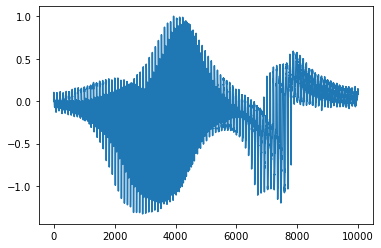

In [4]:
plt.plot(data)

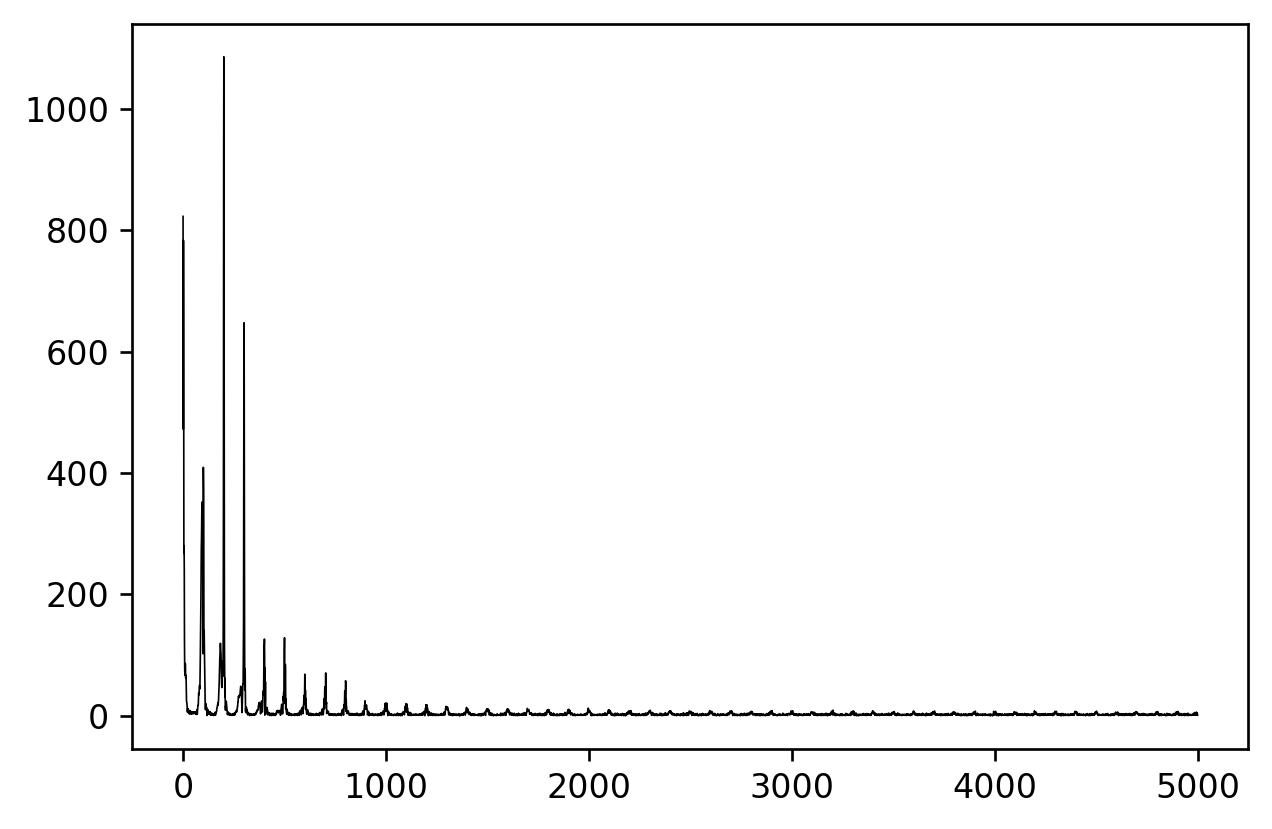

In [5]:
n = data.size
fq = 1./1.
t = np.linspace(0.0, n*fq, n, endpoint=False)

n_f = n//2 + 1
data_f = fft(data)
t_f = fftfreq(n, fq)
data_f_mag = np.abs(data_f)[:n_f]
data_f_phase = np.angle(data_f)

fig, ax = plt.subplots(dpi=240)
ax.plot(data_f_mag, "k", linewidth=.5, label="исходный сигнал")
plt.show()

In [6]:
crs = np.arange(2, 12, 2)
records_f = {}
for cr in crs:
    print("cr ", cr)
    m = n_f // cr
    a_mat = np.random.normal(0, 1/np.sqrt(m), size=(m, n_f))
    y_f_mag = a_mat.dot(data_f_mag)

    c_arr = np.ones(n_f)
    res = linprog(c_arr, A_eq=a_mat, b_eq=y_f_mag)['x']
    rdata_f_mag = np.array(res)
    rdata_f_mag = np.concatenate([rdata_f_mag, np.flip(rdata_f_mag)[1:-1]])
    records_f[cr] = rdata_f_mag

cr  2
cr  4
cr  6
cr  8
cr  10


In [7]:
freqs = np.arange(n_f)

In [30]:
records = {}
for cr, rdata_f_mag in records_f.items():
    rdata_f_canon = rdata_f_mag * (np.cos(data_f_phase) + np.sin(data_f_phase) * 1j)
    rdata = ifft(rdata_f_canon)
    records[cr] = np.real(rdata)

data_f_canon = np.concatenate([data_f_mag, np.flip(data_f_mag)[1:-1]]) * np.exp(1j * data_f_phase)
data_if = ifft(data_f_canon)

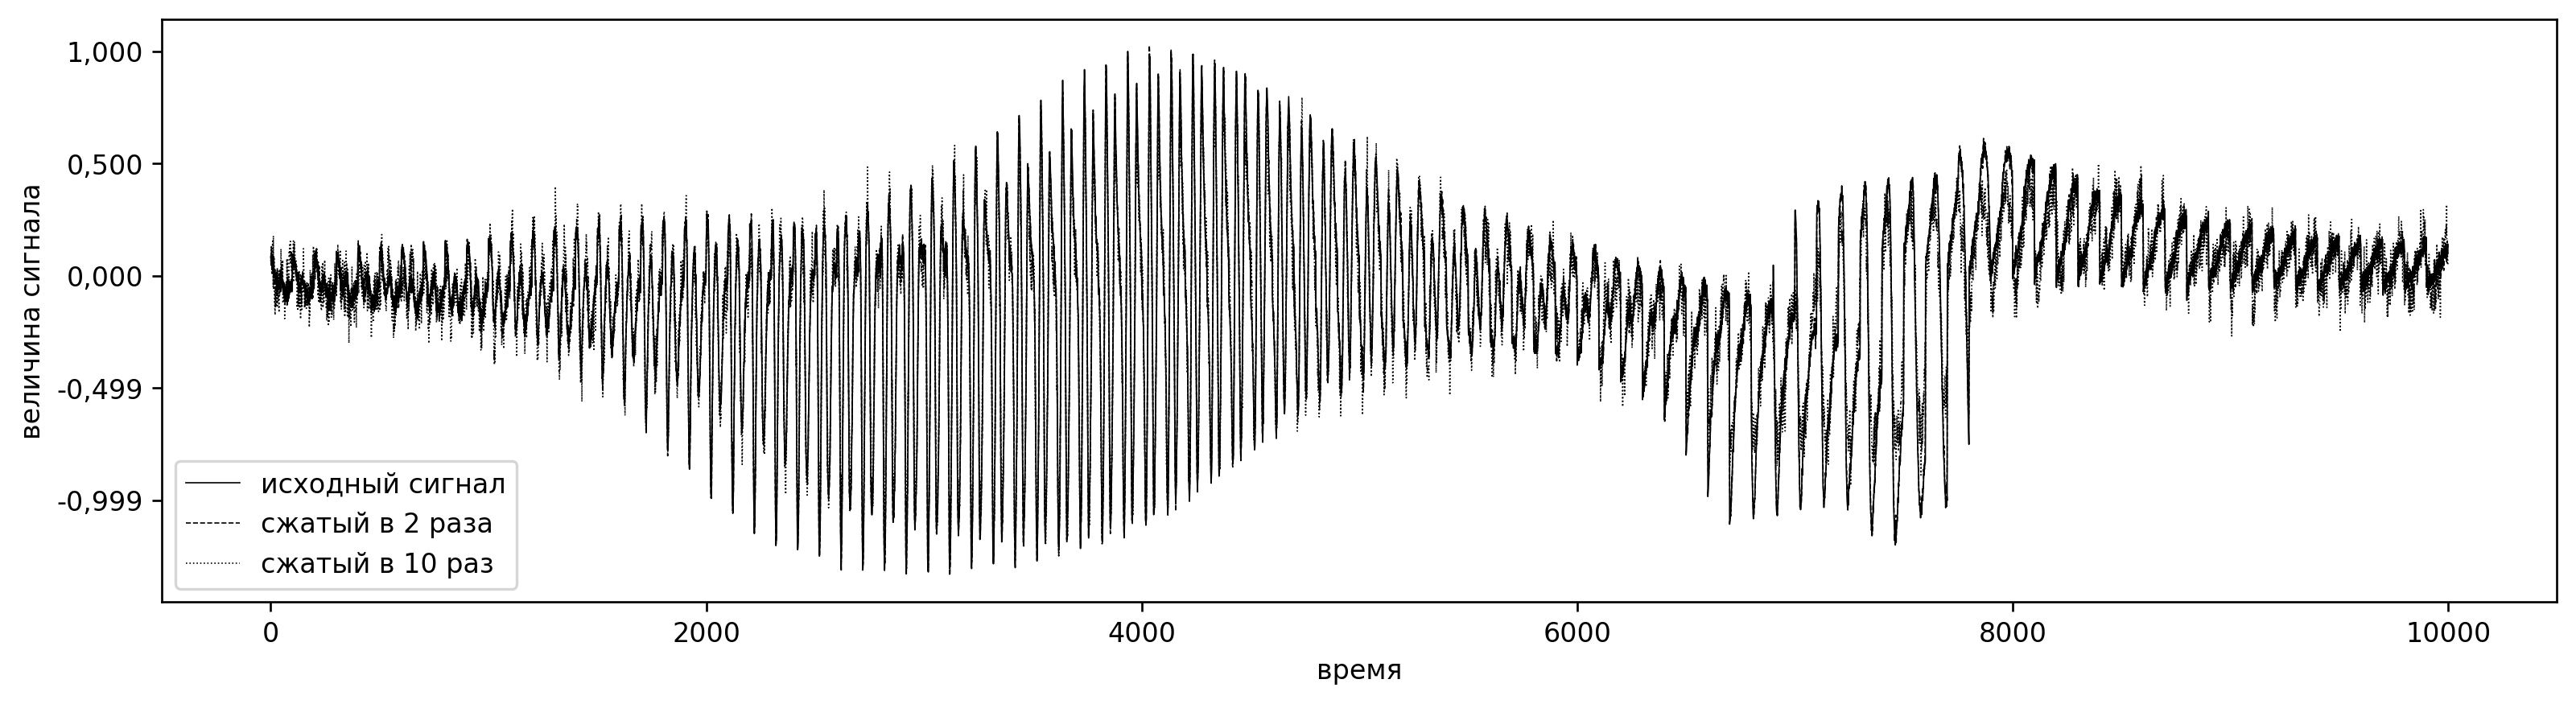

In [31]:
fig, ax = plt.subplots(figsize=(16, 4), dpi=240)
slc = slice(0, 10000)

ax.plot(t[slc], data[slc], "k", linewidth=.5, label="исходный сигнал")
ax.plot(t[slc], records[2][slc], "k--", linewidth=.5, label="сжатый в 2 раза")
ax.plot(t[slc], records[10][slc], "k:", linewidth=.5, label="сжатый в 10 раз")
plt.xlabel("время")
plt.ylabel("величина сигнала")
plt.legend(loc='lower left')
plt.savefig("./compress_compare_macro.png")
ax.yaxis.set_major_formatter(y_format1)
plt.show()

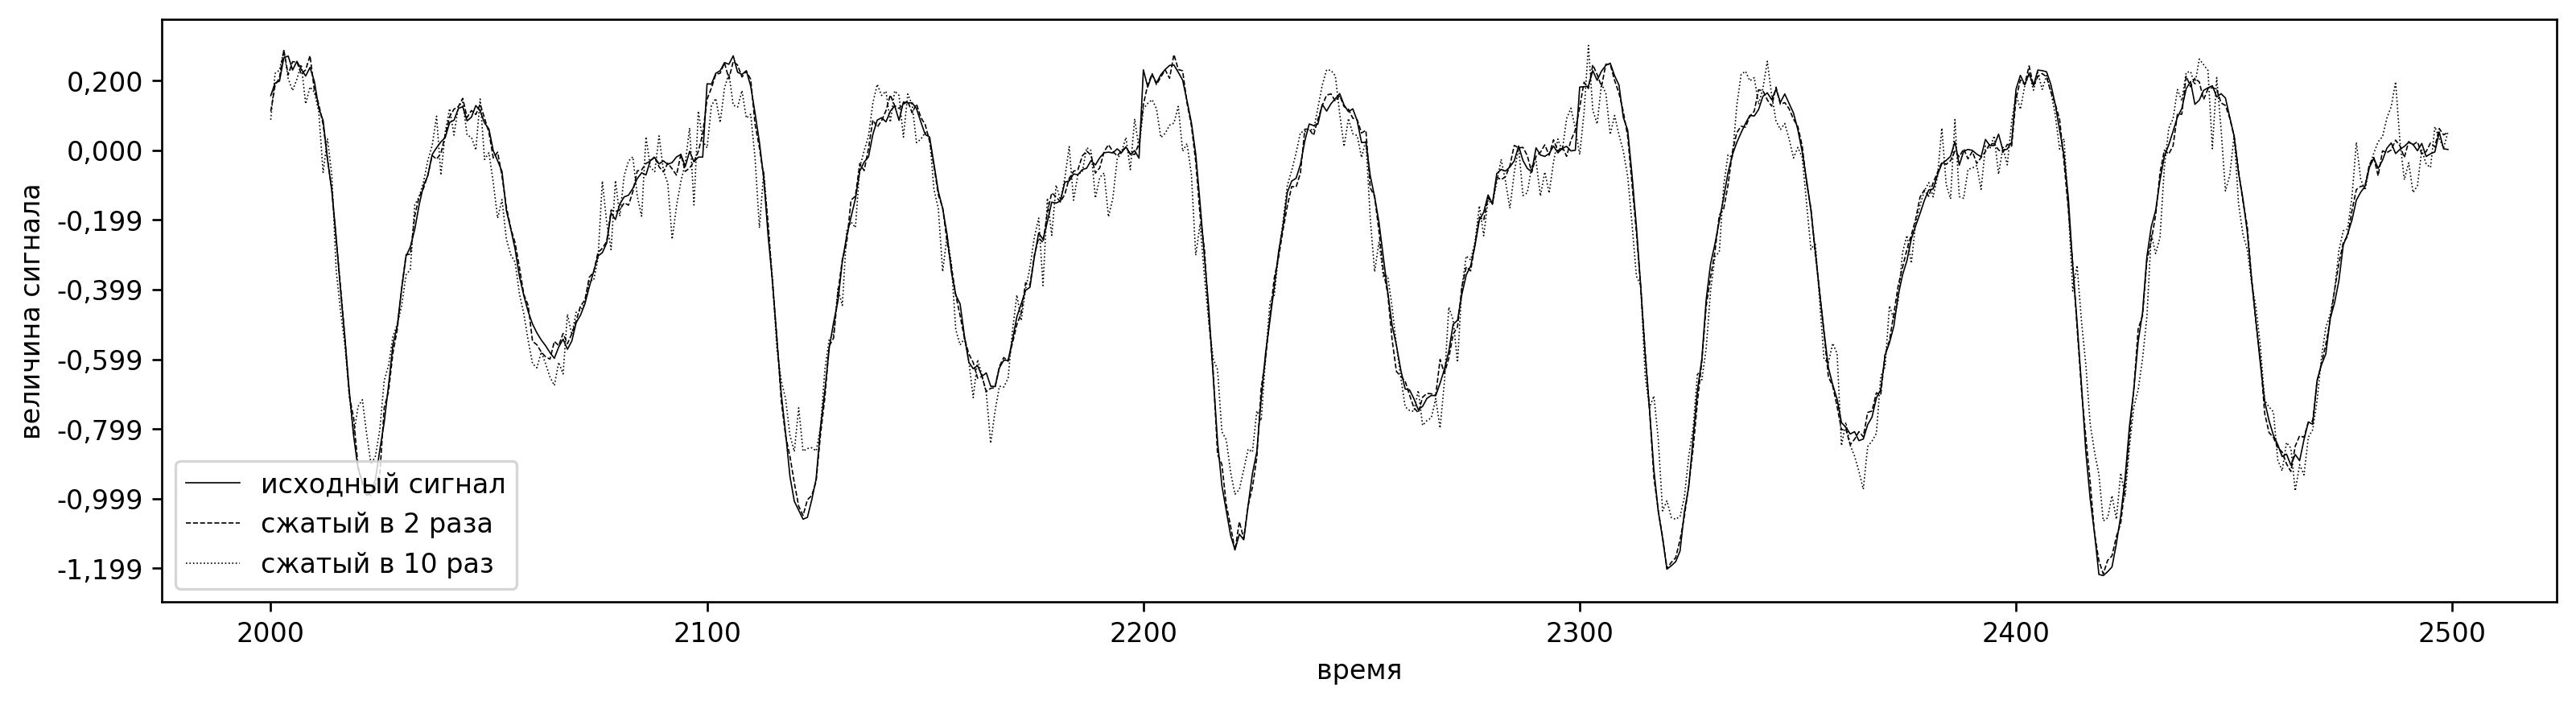

In [32]:
fig, ax = plt.subplots(figsize=(16, 4), dpi=240)
slc = slice(2000, 2500)

ax.plot(t[slc], data[slc], "k", linewidth=.5, label="исходный сигнал")
ax.plot(t[slc], records[2][slc], "k--", linewidth=.5, label="сжатый в 2 раза")
ax.plot(t[slc], records[10][slc], "k:", linewidth=.5, label="сжатый в 10 раз")
plt.xlabel("время")
plt.ylabel("величина сигнала")
plt.legend(loc='lower left')
plt.savefig("./compress_compare_local.png")
ax.yaxis.set_major_formatter(y_format1)
plt.show()

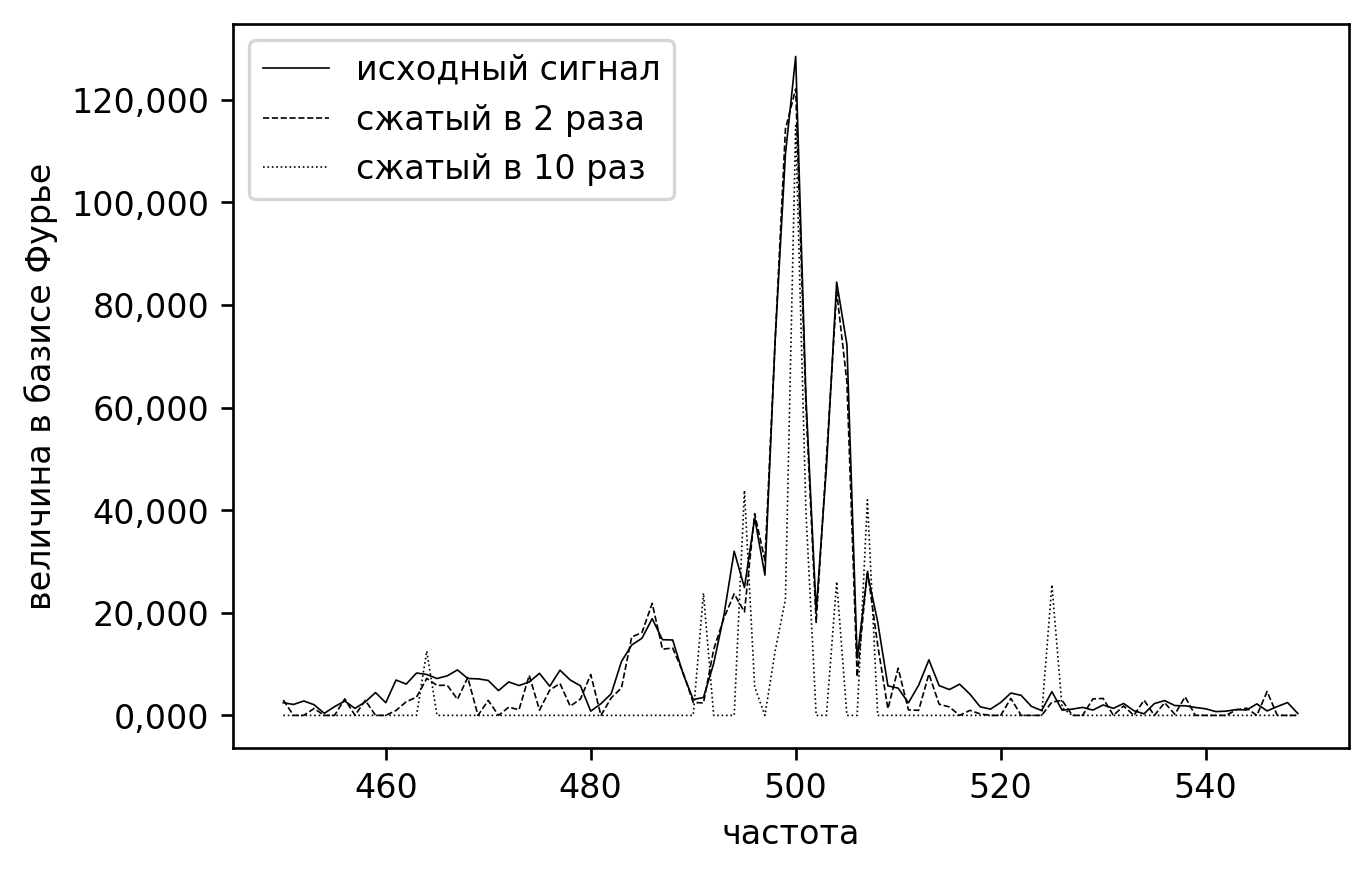

In [33]:
fig, ax = plt.subplots(dpi=240)
slc = slice(450, 550)
ax.plot(freqs[slc], data_f_mag[slc], "k", linewidth=.5, label="исходный сигнал")
ax.plot(freqs[slc], records_f[2][slc], "k--", linewidth=.5, label="сжатый в 2 раза")
ax.plot(freqs[slc], records_f[10][slc], "k:", linewidth=.5, label="сжатый в 10 раз")
plt.xlabel("частота")
plt.ylabel("величина в базисе Фурье")
plt.legend(loc='upper left')
plt.savefig("./compress_compare_Fourier.png")
ax.yaxis.set_major_formatter(y_format1)
plt.show()

KeyError: 0

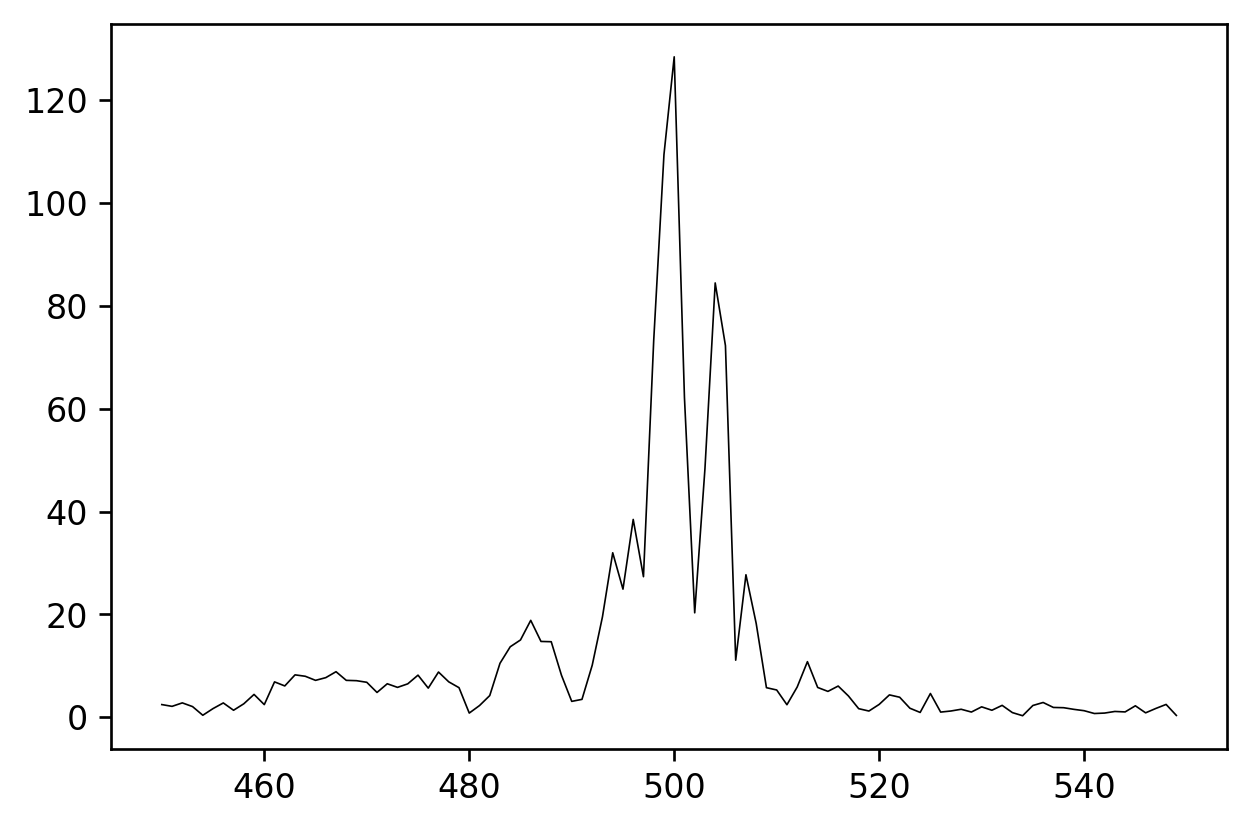

In [34]:
fig, ax = plt.subplots(dpi=240)
slc = slice(450, 550)
ax.plot(freqs[slc], data_f_mag[slc], "k", linewidth=.5, label="initial signal")
ax.plot(freqs[slc], records_f[0][slc], "k--", linewidth=.5, label="2x compression")
ax.plot(freqs[slc], records_f[1][slc], "k:", linewidth=.5, label="10x compression")
plt.xlabel("frequency")
plt.ylabel("magnitude")
plt.legend(loc='upper left')
plt.savefig("./compress_compare_Fourier_en.png")
ax.yaxis.set_major_formatter(y_format1)
plt.show()

In [40]:
l2s = []
for rdata in records.values():
    l2s.append(np.linalg.norm(data - rdata, ord=2))
print(l2s)

[2.586774526345404, 4.554047602813293, 7.206891181541875, 9.024914569225333, 10.898760839474871]


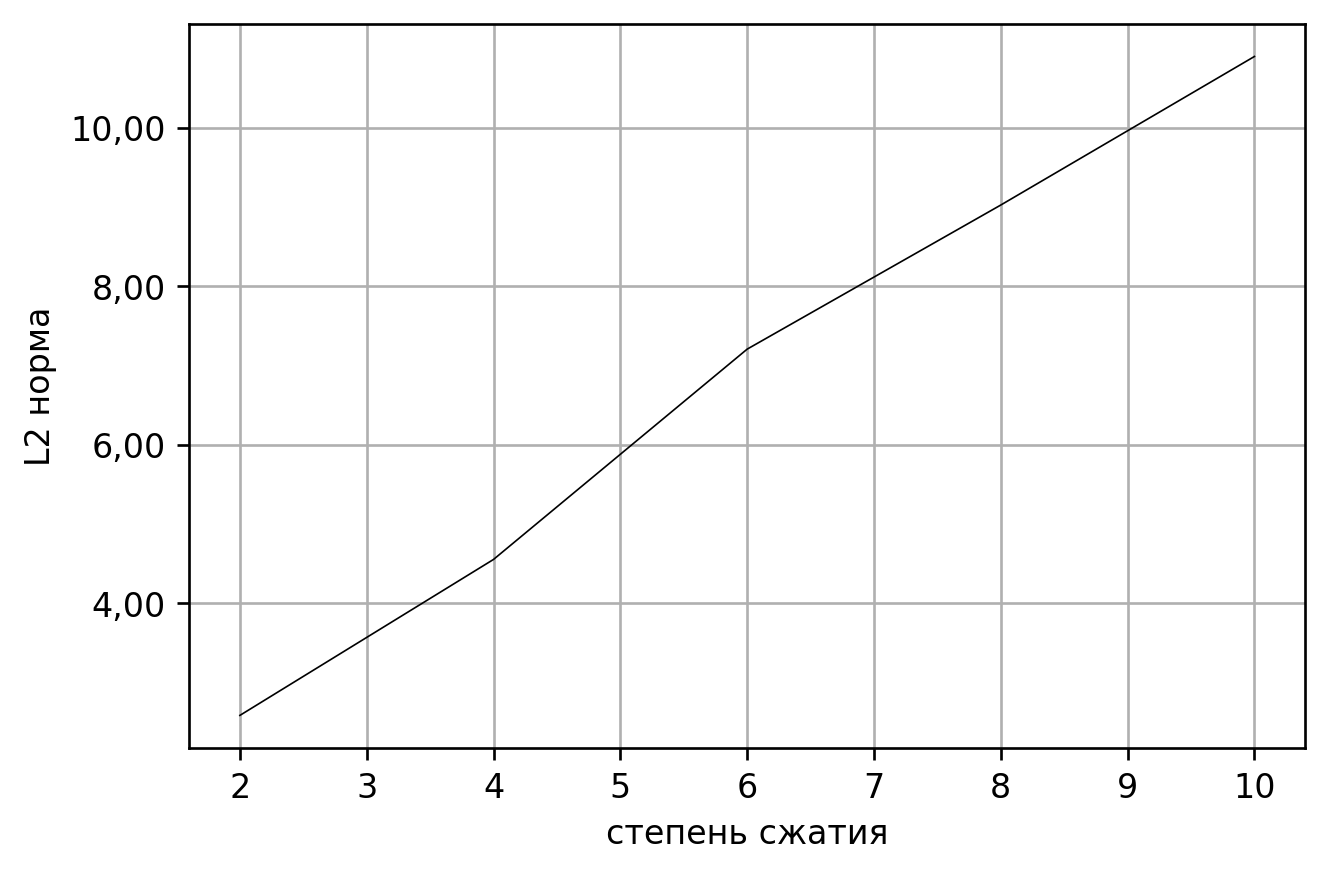

In [38]:
fig, ax = plt.subplots(dpi=240)
ax.plot(crs, l2s, "k", linewidth=.5)
plt.grid()
plt.xlabel("степень сжатия")
plt.ylabel("L2 норма")
plt.savefig("l2.png")
ax.yaxis.set_major_formatter(y_format2)
plt.show()

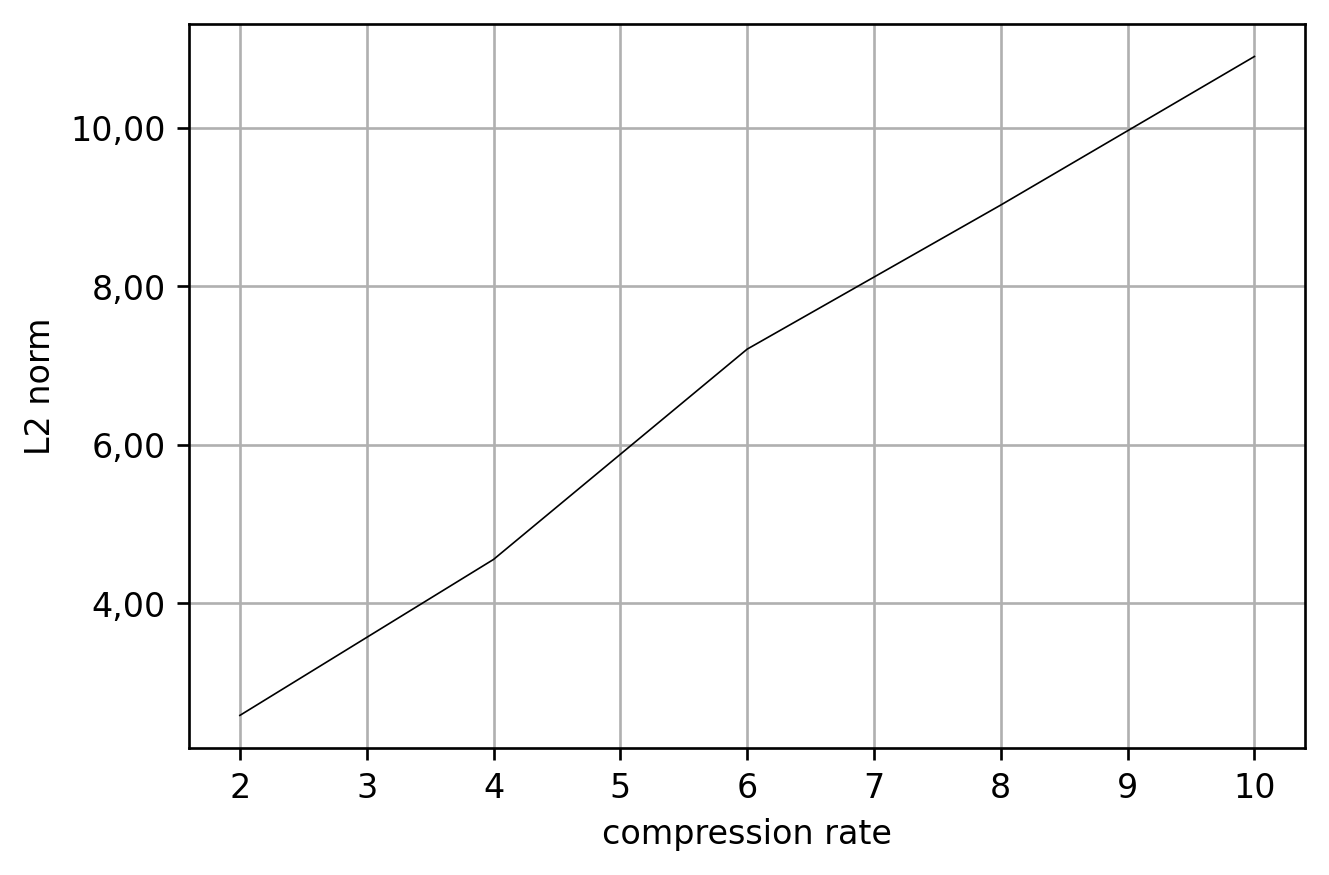

In [39]:
fig, ax = plt.subplots(dpi=240)
ax.plot(crs, l2s, "k", linewidth=.5)
plt.grid()
plt.xlabel("compression rate")
plt.ylabel("L2 norm")
plt.savefig("l2_en.png")
ax.yaxis.set_major_formatter(y_format2)
plt.show()